In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Downloads/weather_forecast_data.csv')
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
# Check for missing values and clean if necessary
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [6]:
# Handle categorical target variable 'Rain'
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})

# Normalize the numerical columns
scaler = StandardScaler()
numerical_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Elbow Plot: K-means Clustering

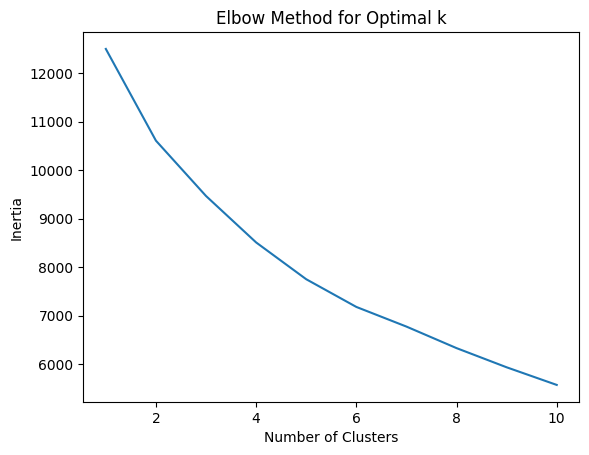

In [9]:
# Elbow method to determine the optimal number of clusters
def plot_elbow():
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df[numerical_features])
        inertia.append(kmeans.inertia_)
    
    # Plot the elbow curve
    plt.plot(range(1, 11), inertia)
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow()

## Scatter Plot: K-means Clustering Results

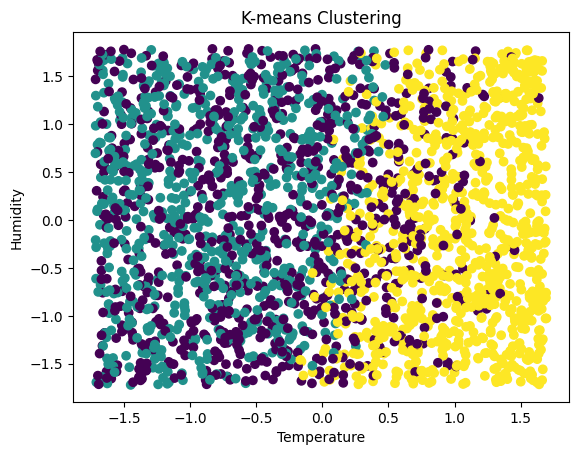

In [12]:
# Perform K-means clustering
def plot_kmeans_clusters():
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[numerical_features])

    # Visualizing the clusters
    plt.scatter(df['Temperature'], df['Humidity'], c=df['Cluster'], cmap='viridis')
    plt.title('K-means Clustering')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')
    plt.show()

plot_kmeans_clusters()

## Heatmap: Correlation Matrix

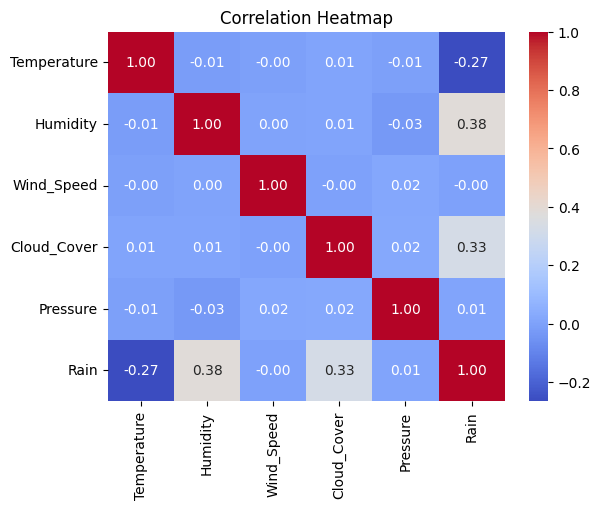

In [13]:
# Heatmap to visualize correlations between numerical features
def plot_heatmap():
    corr_matrix = df[numerical_features + ['Rain']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()

## Linear Regression: Fitting the Line

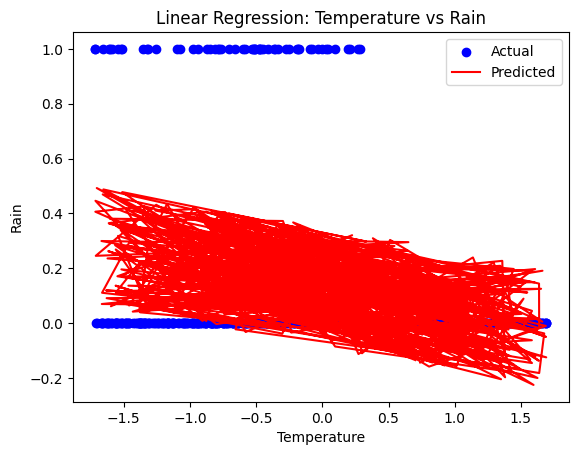

In [15]:
from sklearn.metrics import mean_squared_error

# Linear regression fitting and plot
def plot_regression():
    # Prepare data for fitting
    X = df[['Temperature', 'Humidity']]
    y = df['Rain']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions and plotting the regression line
    y_pred = model.predict(X_test)

    # Scatter plot of actual vs predicted
    plt.scatter(X_test['Temperature'], y_test, color='blue', label='Actual')
    plt.plot(X_test['Temperature'], y_pred, color='red', label='Predicted')
    plt.title('Linear Regression: Temperature vs Rain')
    plt.xlabel('Temperature')
    plt.ylabel('Rain')
    plt.legend()
    plt.show()

plot_regression()

## Model Performance: Silhouette Score for K-means

In [18]:
from sklearn.metrics import silhouette_score

# Evaluate clustering with Silhouette Score
def evaluate_clustering():
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[numerical_features])
    sil_score = silhouette_score(df[numerical_features], df['Cluster'])
    print(f'Silhouette Score: {sil_score}')

evaluate_clustering()

Silhouette Score: 0.1353791620385155
